In [4]:
!pip install pgmpy
!pip install feature_engine

  Using cached feature_engine-1.6.1-py2.py3-none-any.whl (326 kB)


In [5]:
import pandas as pd
import numpy as np

from pgmpy.estimators import HillClimbSearch, MaximumLikelihoodEstimator, BicScore
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

from feature_engine import discretisation as dsc

import networkx as nx
import pylab as plt
import time

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [28]:
import matplotlib.pyplot as plt2

In [6]:
df_credit = pd.read_csv("german_credit.csv")

In [7]:
target = "Risk"

In [8]:
df_credit.head()

,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,4,67,male,2,own,NaN,1169,6,radio/TV,good
1,2,22,female,2,own,little,5951,48,radio/TV,bad
2,4,49,male,1,own,little,2096,12,education,good
3,2,45,male,2,free,little,7882,42,furniture/equipment,good
4,3,53,male,2,free,little,4870,24,car,bad


In [9]:
### Lets say if a feature has more than 32 unique values, we will bin it
col_list = []
for col in df_credit.columns:
    print(col, ": ", len(df_credit[col].unique()))
    if(len(df_credit[col].unique()) > 32):
        col_list.append(col)

Credit History :  5
Age :  53
Gender :  2
Job :  4
Housing :  3
Saving accounts :  5
Credit amount :  921
Duration :  33
Purpose :  8
Risk :  2


In [10]:
num_bins = 3
disc = dsc.EqualFrequencyDiscretiser(q=num_bins, variables=col_list)
df_binned = disc.fit(df_credit[col_list])
equalfrequency_discretizer_dict = disc.binner_dict_
bin_df_equalfrequency = pd.DataFrame.from_dict(equalfrequency_discretizer_dict, orient = 'index')  

In [11]:
bin_df_equalfrequency

,0,1,2,3
Age,-inf,28.0,38.0,inf
Credit amount,-inf,1554.0,3368.0,inf
Duration,-inf,12.0,24.0,inf


In [12]:
### Age has min and max as 19 and 75 respectively
min(df_credit['Age'].unique()), max(df_credit['Age'].unique())
bin_age = ['19 to 28', '28 to 38', '38 to 75']

(19, 75)

In [13]:
### Credit amount has min and max as 250 and 18424 respectively
min(df_credit['Credit amount'].unique()), max(df_credit['Credit amount'].unique())
bin_credit_amount = ['250 to 1554', '1554 to 3368', '3368 to 18424']

(250, 18424)

In [14]:
### Duration has min and max as 4 and 72 respectively
min(df_credit.Duration.unique()), max(df_credit.Duration.unique())
bin_duration = ['4 to 12', '12 to 24', '24 to 72']

(4, 72)

In [15]:
df_credit['Age'] = pd.cut(df_credit['Age'], 3, labels= bin_age)
df_credit['Credit amount'] = pd.cut(df_credit['Credit amount'], 3, labels= bin_credit_amount)
df_credit['Duration'] = pd.cut(df_credit['Duration'], 3, labels= bin_duration)


In [16]:
df_credit.describe()

,Credit History,Job
count,1000.00000,1000.000000
mean,2.54500,1.904000
std,1.08312,0.653614
min,0.00000,0.000000
25%,2.00000,2.000000
50%,2.00000,2.000000
75%,4.00000,2.000000
max,4.00000,3.000000


In [17]:
df_train = df_credit[:900]
df_test = df_credit[900:]
df_credit.shape
df_train.shape
df_test.shape

(1000, 10)

(900, 10)

(100, 10)

In [50]:
hc = HillClimbSearch(df_train)
best_model = hc.estimate(scoring_method=BicScore(df_train))
edges = list(best_model.edges())
model = BayesianModel(edges)

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [51]:
nx_graph = nx.DiGraph()
nx_graph.add_edges_from(edges)

<Figure size 1000x800 with 0 Axes>

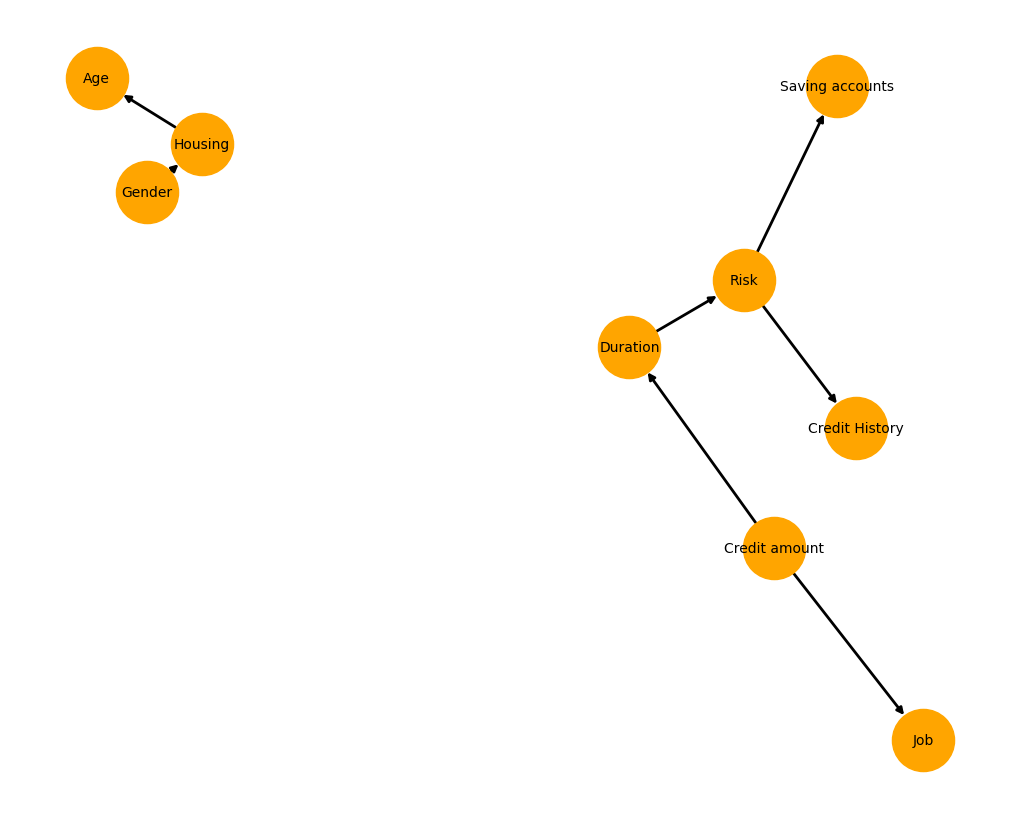

In [52]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos=pos, with_labels=True, node_size=2000, node_color="orange", width=2, font_size=10)
plt.show()

In [38]:
G.add_edges_from(edges)
nx.draw_networkx(G, with_label = True)
  
print("Total number of nodes: ", int(G.number_of_nodes()))
print("Total number of edges: ", int(G.number_of_edges()))
print("List of all nodes: ", list(G.nodes()))
print("List of all edges: ", list(G.edges(data = True)))
print("Degree for all nodes: ", dict(G.degree()))
  
print("Total number of self-loops: ", int(G.number_of_selfloops()))
print("List of all nodes with self-loops: ",
             list(G.nodes_with_selfloops()))
  
print("List of all nodes we can go to in a single step from node 2: ",
                                                 list(G.neighbors(2)))

ValueError: Received invalid argument(s): with_label

In [42]:
import matplotlib as mpl

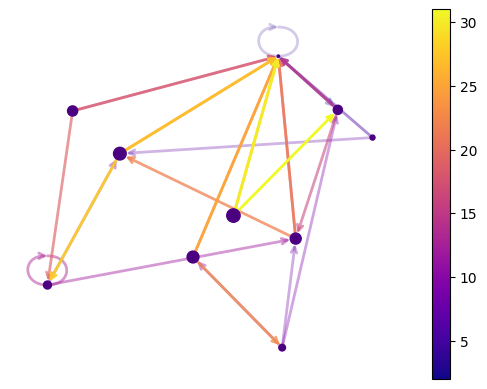

In [43]:
seed =42
G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
pos = nx.spring_layout(G, seed=seed)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)

ax = plt.gca()
ax.set_axis_off()
plt.colorbar(pc, ax=ax)
plt.show()

Diagnostic plot 

In [49]:
print("Nodes in the graph:", model.nodes())
print("Edges in the graph:", model.edges())

Nodes in the graph: ['Gender', 'Housing', 'Age', 'Credit amount', 'Duration', 'Job', 'Risk', 'Credit History', 'Saving accounts']
Edges in the graph: [('Gender', 'Housing'), ('Housing', 'Age'), ('Credit amount', 'Duration'), ('Credit amount', 'Job'), ('Duration', 'Risk'), ('Risk', 'Credit History'), ('Risk', 'Saving accounts')]


In [22]:
# Fitting the data to the model using Maximum Likelihood Estimator
model.fit(df_train, estimator=MaximumLikelihoodEstimator)

# Doing exact inference using Variable Elimination
infer = VariableElimination(model)

In [23]:
model.get_children(target)

['Credit History', 'Saving accounts']

In [24]:
model.get_parents(target)

['Duration']

Joint Distribution

In [25]:
print(infer.query(variables=[target, 'Gender'], joint= True))

+------------+----------------+--------------------+
| Risk       | Gender         |   phi(Risk,Gender) |
+============+================+====================+
| Risk(bad)  | Gender(female) |             0.1025 |
+------------+----------------+--------------------+
| Risk(bad)  | Gender(male)   |             0.2177 |
+------------+----------------+--------------------+
| Risk(good) | Gender(female) |             0.2177 |
+------------+----------------+--------------------+
| Risk(good) | Gender(male)   |             0.4621 |
+------------+----------------+--------------------+


In [26]:
print(infer.query(variables=[target], evidence={'Gender': 'male'}))
print(infer.query(variables=[target], evidence={'Gender': 'female'}))

+------------+-------------+
| Risk       |   phi(Risk) |
+============+=============+
| Risk(bad)  |      0.3202 |
+------------+-------------+
| Risk(good) |      0.6798 |
+------------+-------------+
+------------+-------------+
| Risk       |   phi(Risk) |
+============+=============+
| Risk(bad)  |      0.3202 |
+------------+-------------+
| Risk(good) |      0.6798 |
+------------+-------------+


In [27]:
list_range = bin_credit_amount
for i in list_range:
    print(i)
    print(infer.query(variables=[target], evidence = {'Credit amount': i}))

250 to 1554
+------------+-------------+
| Risk       |   phi(Risk) |
+============+=============+
| Risk(bad)  |      0.3043 |
+------------+-------------+
| Risk(good) |      0.6957 |
+------------+-------------+
1554 to 3368
+------------+-------------+
| Risk       |   phi(Risk) |
+============+=============+
| Risk(bad)  |      0.4397 |
+------------+-------------+
| Risk(good) |      0.5603 |
+------------+-------------+
3368 to 18424
+------------+-------------+
| Risk       |   phi(Risk) |
+============+=============+
| Risk(bad)  |      0.5214 |
+------------+-------------+
| Risk(good) |      0.4786 |
+------------+-------------+
